## Sprint3

### Tasca M3 T02

In [1]:
# importem les llibreries que farem servir

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from astropy import units as u

### Exercici 1

Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un Pandas Dataframe. Explora les dades que conté, explica breument quines variables hi ha i queda’t únicament amb les columnes que consideris rellevants. Justifica la teva elecció.

Redueix la dimensió del dataset de manera aleatòria per tal d'obtenir un dataset de només 200.000 registres. Tots els exercicis s'han de fer amb aquest dataset reduït.

In [2]:
# Llegim el dataframe amb pandas, comprovem el número d'elements i els reduirem a 200.000 mostres com exigit.
# Finalment mostrem el nom i tipus de variables que conté.

df = pd.read_csv('archive/DelayedFlights.csv') 

# Les dades originals es poden trobar a: https://www.kaggle.com/datasets/giovamata/airlinedelaycauses

print('El número d observacions original és de {}'.format(len(df)))

#Reduim el df, el randomstate (llavor) ens servirà per la reproductabilitat de la mostra

df_sample = df.sample(n=200000, random_state=62)
print('El número d observacions ara és de {}'.format(len(df_sample)))

df_sample.dtypes

El número d observacions original és de 1936758
El número d observacions ara és de 200000


Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

Breument describim les dades separades del dataset:

1. **Year** Any 2008 - int64
2. **Month** mesos de 1 a 12 - int64
3. **DayofMonth** dia del mes 1 a 31 - int64
4. **DayofWeek** dia de la setmana 1 a 7 - int64
5. **DepTime** hora de sortida - format HHMM - float64
6. **CRSDepTime** hora de sortida programada - format HHMM int64
7. **ArrTime** hora d'arribada - format HHMM float64 
8. **CRSArrTime** hora d'arribada programada - format HHMM int64
9. **UniqueCarrier** codi de transportista - objecte 
10. **FlightNum** número de vol - int64
11. **TailNum** número de la cua d'avió. Identificador únic de l'avió - int64
12. **ActualElapsedTime** minuts. Temps actual trancorregut - float64
13. **CRSElapsedTime** minuts. temps transcorregut CRS (Computerized Reservation System) - float64 
14. **AirTime** temps de vol en minuts - float64  
15. **ArrDelay** minuts. Temps d'atràs - float64
16. **DepDelay** minuts. Retard en la sortida - float64 
17. **Origin** Codi d'orígen de l'aeroport - objecte
18. **Dest** Codi de destí de l'aeroport - objecte
19. **Distance** milles. Distància recorreguda- int64
20. **TaxiIn** minuts. Taxi a temps - float64
21. **TaxiOut** minuts. Taxi fora de temps - float64
22. **Cancelled** Vol cancel.lat 0 (No) 1 (si) - int64
23. **CancellationCode** Codi de cancel.lació (A = transportista, B = temps, C = NAS(National Aviation System), D = seguretat) - objecte
24. **Diverted** Desviat 0 (No) 1 (Si) - int64
25. **CarrierDelay** minuts. Atràs degut a la companyia - float64
26. **WeatherDelay** minuts. Atràs degut al mal temps - float64
27. **NASDelay** minuts. Atràs degut al sistema aeroespacial nacional (NAS) - float64
28. **SecurityDelay** minuts. Atràs per motius de seguretat - float64
29. **LateAircraftDelay** minuts. Atràs degut a un previ atràs en el mateix avió 

Primer de tot, donem un cop d'ull al número de valors nuls. 


In [3]:
df_sample.isna().sum()

Unnamed: 0               0
Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                801
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  1
ActualElapsedTime      919
CRSElapsedTime          19
AirTime                919
ArrDelay               919
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                 801
TaxiOut                 40
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay         71582
WeatherDelay         71582
NASDelay             71582
SecurityDelay        71582
LateAircraftDelay    71582
dtype: int64

Trobem números nuls en 12 columnes. Les més importants per l'anàlisis són **ArrDelay** i **CarrierDelay**, **WeatherDelay**, **NASDelay**, **SecurityDelay** i **LateAirCraftDelay**. Eliminarem tots els nobres nuls de la columna **ArrDelay** que és la que ens indica si l'avió va arribar amb retard o no. 

Les columnes que mostren el motiu dels retards en minuts no les eliminarem en un primer moment, ja que els valors són nuls indiquen vols que van arribar puntuals: de la nostra mostra de 200.000 vols, 70.630 vans ser puntuals.


Algunes operacions amb les dades:
1. Transformem les columnes Year, Month, i YearofMonth en una sola columna **date** del tipus datetime.
2. Passem la columna **Distance**, de milles a kms.
3. Creem una nova columna **vel** calculant la velocitat mitjana en km/h
4. Creem una nova columna **ruta** amb els codis orígen i destí.
3. Deixem totes les columnes en format hora HHMM com a numeros enters.
4. Eliminem totes les observacions on falta informació del retard de l'avió ArrDelay. Normalment va lligada a la falta d'informació de l'arribada del vol.

5. Escollim les columnes d'interès:
- S'ha eliminat les columnes referents a CRS (Computarized Reservation System) ja que servirien per calcular el temps de retard en la sortida i l'arribada, però aquestes columnes ja apareixen al data frame.
- Flight Number i Tail number també han estat descartades ja que, en aquest treball no farem un seguiment pel número de vol o tipus d'avió.
- Com que en la nostra mostra no aparèixen vols cancel.lats o desviats, eliminarem aquestes columnes també així com el codi de cancel.lació.

In [4]:
#df_sample['date'] = pd.to_datetime(df_sample[['Year', 'Month', 'DayofMonth']])
df_sample = df_sample.rename(columns={'DayofMonth': 'Day'})
df_sample['date'] = pd.to_datetime(df_sample[['Year', 'Month', 'Day']])
df_sample['Distance'] = df_sample['Distance']*1.609344
df_sample = df_sample.dropna(subset='ArrDelay')
df_sample['DepTime'] = df_sample['DepTime'].astype(int)
df_sample['ArrTime'] = df_sample['ArrTime'].astype(int)
df_sample['vel'] = df_sample['Distance']/(df_sample['ActualElapsedTime']/60) # En km/h
df_sample['ruta'] = (df_sample['Origin'] + '-' + df_sample['Dest'])

vols = df_sample.copy()
vols = vols[['date', 'DayOfWeek', 'DepTime', 'ArrTime','UniqueCarrier', 'AirTime', 'ArrDelay', 'DepDelay',
            'ActualElapsedTime','Origin', 'Dest', 'Distance', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
             'SecurityDelay','LateAircraftDelay', 'vel', 'ruta']]

# Aquí només mostrem perquè hem elimintat les columnesde vols cancel.lats o desviats.
#Ens centrarem per tant en els atrasats.

vols_cancel = len(df_sample[(df_sample['Cancelled'] == 1) | (df_sample['Diverted'] == 1)])
print('Observem {} vols cancel.lats o desviats'.format(vols_cancel))

Observem 0 vols cancel.lats o desviats


Donem un cop d'ull de nou al data frame vols, especificament a les columnes **ArrDelay**, **CarrierDelay**, **WeatherDelay**, **NASDelay**, **SecurityDelay**, **LateAircraftDelay**

In [5]:
vols[['ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].head(10)

,ArrDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1915714,34.0,0.0,0.0,0.0,0.0,34.0
1851877,11.0,NaN,NaN,NaN,NaN,NaN
638890,9.0,NaN,NaN,NaN,NaN,NaN
751135,84.0,0.0,61.0,0.0,0.0,23.0
1225486,6.0,NaN,NaN,NaN,NaN,NaN
604334,111.0,35.0,0.0,0.0,0.0,76.0
321999,70.0,0.0,0.0,64.0,0.0,6.0
1104251,11.0,NaN,NaN,NaN,NaN,NaN
1121509,41.0,0.0,0.0,0.0,0.0,41.0
1004385,9.0,NaN,NaN,NaN,NaN,NaN


Observem que quant el temps d'atràs en minuts é menor que 15, no es considera el vol com endarrerit i els motius de l'enderreriment en minuts consten com a valors nuls. Enlloc d'eliminar-los amb el dropna, crearem una nova columna **delay** amb una variable binomial, on 0 vol dir no atrasat i 1 atrasat.
Seguidament comprovem que tots els vols atrasats tenen un **ArrDelay** superior a 15 minuts i cap dels motius de l'atràs és nul.


In [6]:
for el in vols:
    vols.loc[vols['ArrDelay'] <= 15, 'delay'] = 0
    vols.loc[vols['ArrDelay'] > 15, 'delay'] = 1
vols['delay'] = vols['delay'].astype(int)

vols_atras = vols[vols['delay'] == 1]
#vols_puntuals = vols[vols['delay'] == 0] Si es vol tenir un df amb tots els vols puntuals

vols_atras[['ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].head(10)

,ArrDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1915714,34.0,0.0,0.0,0.0,0.0,34.0
751135,84.0,0.0,61.0,0.0,0.0,23.0
604334,111.0,35.0,0.0,0.0,0.0,76.0
321999,70.0,0.0,0.0,64.0,0.0,6.0
1121509,41.0,0.0,0.0,0.0,0.0,41.0
985012,46.0,0.0,0.0,0.0,0.0,46.0
834029,57.0,0.0,0.0,57.0,0.0,0.0
80409,101.0,0.0,0.0,21.0,0.0,80.0
1639268,134.0,73.0,0.0,35.0,0.0,26.0
630330,59.0,16.0,0.0,5.0,0.0,38.0


### Exercici 2

Fes un informe complet del dataset:

    Resumeix estadísticament el dataset i les columnes d’interès. Fes una anàlisi estadístic del que consideris rellevant.
    Troba quantes dades faltants hi ha per columna.
    Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...).
    Fes una taula de les aerolínies amb més endarreriments acumulats.
    Quins són els vols més llargs? I els més endarrerits? Busca les rutes més llargues i les que acumulen més retards.
    Aporta allò que consideris rellevant.


#### Vols atrasats vs puntuals

Analitzant si els vols estàn o no atrasats, veiem que el 63% dels vols arriben atrasats. En la distribució, depenent del tamany dels bins, se superposen casos de atrasats i no atrasats, el bin agafa valors entre una mica menys i una mica més de 15 minuts. Això també indica que molts vols arriben pròxims al llindar d'arribar atrasats. Com a curiositat, si el vol es considerés atrasat a partir dels 10 minuts, ho estarien el 72%, gairabé tres de cada quatre avions.

1    0.628046
0    0.371954
Name: delay, dtype: float64


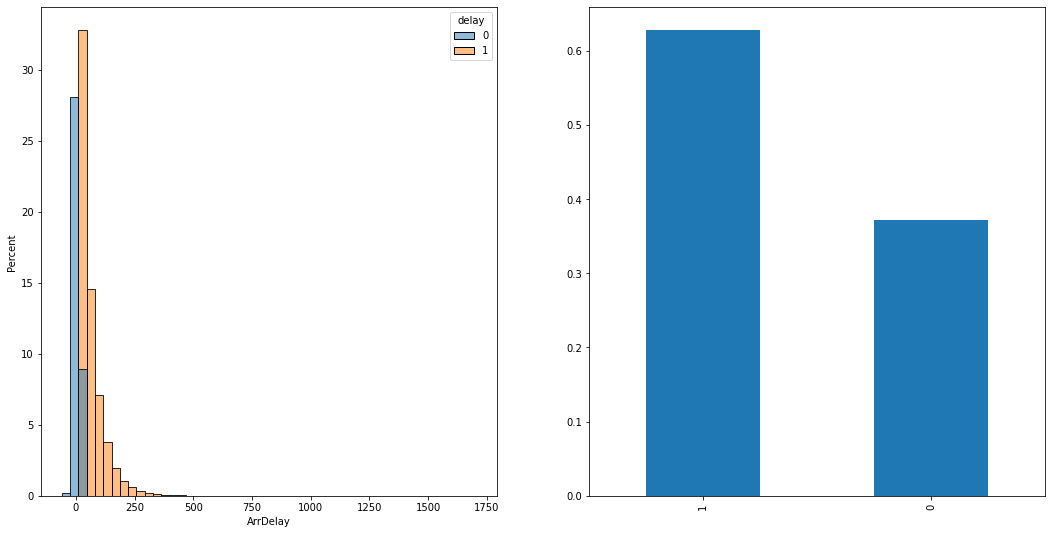

In [7]:
fig, ax = plt.subplots(1,2,figsize=(18,9))

sns.histplot(data = vols, x='ArrDelay', bins=50,  hue=vols['delay'], ax = ax[0], stat='percent')

vols['delay'].value_counts(normalize=True).plot(kind='bar', ax =ax[1])

print(vols['delay'].value_counts()/len(vols))

In [8]:
# Percentatge de vols atrasats si el llindar fos de 10 minuts

nou_llindar = len(vols[vols['ArrDelay'] > 10])/len(vols)
print('El {} % dels vols estarien atrasats si la tolerància fós de 10 minuts'.format(nou_llindar*100))

El 71.69895670606437 % dels vols estarien atrasats si la tolerància fós de 10 minuts


#### Resum bàsic estatística

Per analitzar l'estatistica bàsica deixerem un moment de banda les columnes com ara destí o companyía aerea i ens centrem en les variables on en podem extreure informació estatística.

In [9]:
vols_atras_stats = vols_atras[[ 'AirTime', 'ArrDelay', 'DepDelay', 'DepTime',
            'Distance', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
            'SecurityDelay', 'LateAircraftDelay', 'vel']]
vols_atras_stats.describe()


,AirTime,ArrDelay,DepDelay,DepTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,vel
count,125032.000000,125032.000000,125032.000000,125032.000000,125032.000000,125032.000000,125032.000000,125032.000000,125032.000000,125032.000000,125032.000000
mean,107.415510,64.440031,60.593584,1561.122617,1192.829125,19.457451,3.787590,15.391484,0.088857,25.714649,484.318102
std,67.899409,61.006084,60.169044,454.787644,896.607367,44.134949,21.601893,34.213389,1.924707,42.332097,145.363958
min,0.000000,16.000000,6.000000,1.000000,49.889664,0.000000,0.000000,0.000000,0.000000,0.000000,24.979007
25%,58.000000,27.000000,25.000000,1233.000000,537.520896,0.000000,0.000000,0.000000,0.000000,0.000000,386.242560
50%,90.000000,44.000000,42.000000,1620.000000,957.559680,2.000000,0.000000,2.000000,0.000000,8.000000,494.792214
75%,136.000000,80.000000,76.000000,1926.000000,1561.868352,22.000000,0.000000,15.000000,0.000000,34.000000,589.847567
max,636.000000,1707.000000,1710.000000,2400.000000,7985.564928,1707.000000,1098.000000,865.000000,199.000000,1184.000000,939.086224


Describe és una funció que ens dóna una primera idea del conjunt de dades. D'aquí, podem veure, per exemple, que hi ha una relació estreta entre el retard en la sortida i el retard en l'arribada. Això indica que els retard comencen a l'aeroport de sortida i rarament un cop ja están en ruta. 
També ens dóna una ideia del temps mig, així com els quartils, dels retards en general i dels retards específics. De la mitjana i l'error standart podriem dir que els principals motius dels atrasos són per motius intrínsics a la companyía (**CarrierDelay**) i a un atrás acumulat, l'avió arriba tard i per tant sortirà tard (**LateAircraftDelay**). En canci, atrasos deguts al mal temps són relativament breus, però compte, pot ser que estiguin concentrats en un curt període de temps. Analitzarem millor aquestes variables.

Seguidament, també donarem un cop d'ull a les correlacions linears entre les variables. Primerament en forma de taula i seguidament d'una forma més visual.

In [10]:
vols_atras_stats.corr()

,AirTime,ArrDelay,DepDelay,DepTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,vel
AirTime,1.000000,0.027843,0.000874,-0.062380,0.978060,0.017064,-0.014583,0.061827,0.009271,-0.020616,0.678361
ArrDelay,0.027843,1.000000,0.948821,0.094133,0.015999,0.502816,0.263160,0.384314,-0.006400,0.472295,-0.077833
DepDelay,0.000874,0.948821,1.000000,0.114773,0.016058,0.530415,0.241059,0.226016,-0.007069,0.509011,0.046417
DepTime,-0.062380,0.094133,0.114773,1.000000,-0.058796,-0.053885,0.005635,0.024609,-0.013782,0.169700,-0.011924
Distance,0.978060,0.015999,0.016058,-0.058796,1.000000,0.026307,-0.020637,0.017128,0.008880,-0.008087,0.757174
CarrierDelay,0.017064,0.502816,0.530415,-0.053885,0.026307,1.000000,-0.071799,-0.122815,-0.020130,-0.181151,0.035645
WeatherDelay,-0.014583,0.263160,0.241059,0.005635,-0.020637,-0.071799,1.000000,-0.000727,-0.008095,-0.055235,-0.057950
NASDelay,0.061827,0.384314,0.226016,0.024609,0.017128,-0.122815,-0.000727,1.000000,-0.011317,-0.125437,-0.209068
SecurityDelay,0.009271,-0.006400,-0.007069,-0.013782,0.008880,-0.020130,-0.008095,-0.011317,1.000000,-0.020426,0.007418
LateAircraftDelay,-0.020616,0.472295,0.509011,0.169700,-0.008087,-0.181151,-0.055235,-0.125437,-0.020426,1.000000,0.048876


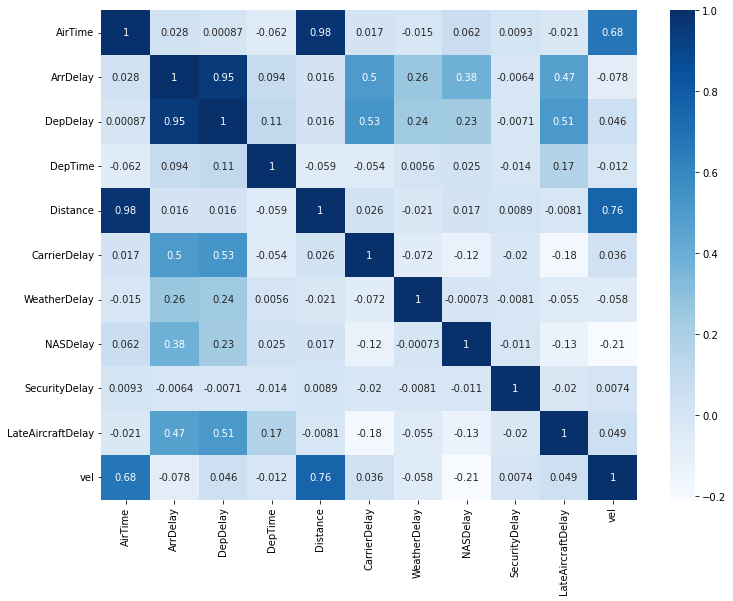

In [11]:
fig, ax = plt.subplots(figsize=(12,9))
dataplot = sns.heatmap(vols_atras_stats.corr(), cmap="Blues", annot=True)

- La correlació més forta que hi ha és entre el temps de vol i la distància (0.98), el que fa tot el sentit del món, i el retard en la sortida i l'arribada (0.95), corroborant el que haviem vist en el primer anàlisis. 
- Trobem una correlació moderada entre la velocitat i la distància i la velocitat i el temps de vol. Dades aparentment coherents.
- Finalment, trobem correlacions fluixes, $r = \approx 0.5$ entre el temps de retard i els retards acumulats i entre el temps de retard i el retard per causes de la companyía. Com comentat anteriorment les causes més evidents aparentment. Aquesta correlació també es dona amb amb el retard en la sortida i les mateixes variables de retards específics.

#### Velocitats

Hem creat una nova columna calculant la velocitat mitjana dels vols en km/h. 
Hem vist una certa correlació entre la velocitat i la distància. Els models d'avió són variats i no tots tenen la meteixa potència per arribar a les més altes velocitats. També, en vols més curts, no té el temps suficient d'agafar la velocitat de creuer, o es fan servir models menys potents.

Dividint la distribució de velocitats pels quartils de les distàncies observem, com comentat, que els pics de les velocitats augmenten en distàncies més llargues. 

Amb aquesta divisió també veiem distribucions molt pròximes a distribucions gaussianes. 

Text(0.5, 0, 'Velocitat [km/h]')

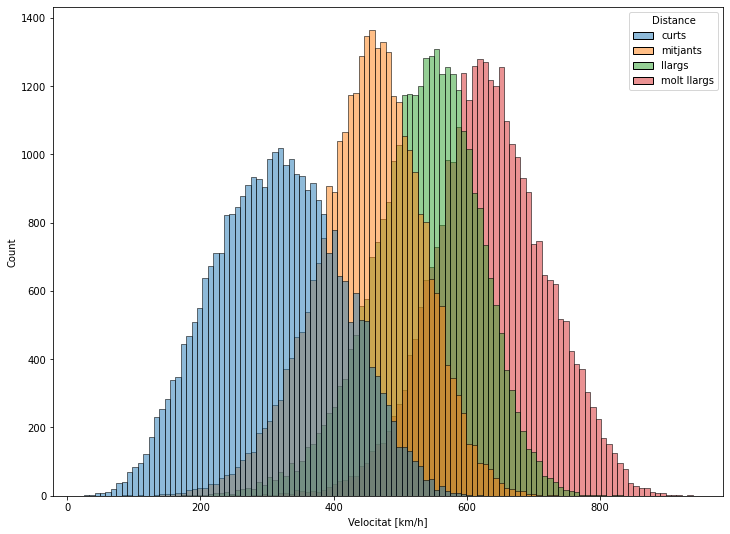

In [12]:
fig, ax = plt.subplots(figsize=(12,9))

chart = sns.histplot(data=vols, x='vel',  hue = pd.qcut(vols_atras['Distance'], q=4,
                     labels=["curts", "mitjants", "llargs", "molt llargs"]))
chart.set_xlabel('Velocitat [km/h]')

### Vols atrasats

En el nostre dataframe no apareix cap vol cancel.lat o desviat, per tant ens concentrarem amb els vols atrasats. A veure com és la distribució de dels vols atrasats.

<Axes: ylabel='ArrDelay'>

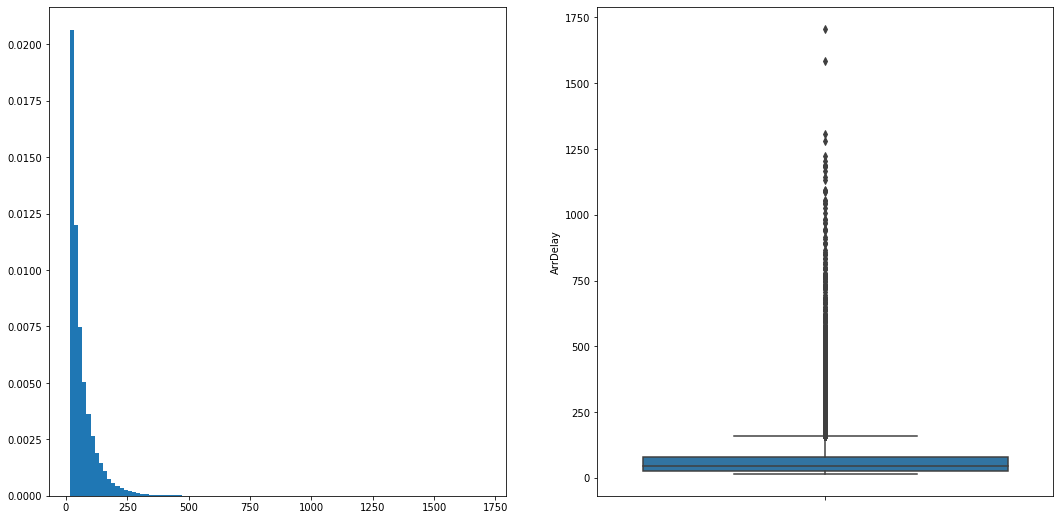

In [13]:
fig, ax = plt.subplots(1,2, figsize=(18,9))

ax[0].hist(vols_atras['ArrDelay'], bins=100, density=True, stacked=True)
sns.boxplot(data = vols_atras, y='ArrDelay')

La distribució és molt assimètrica, cap a l'esquerra, indicant que el 50% dels atrasos són de fins a 44 minuts. Els atrasos més llargs, de més de dues hores són considerats com a outliers dins la nostra estatística.


Tot i que no hi havia una correlació linear clara, en les tres properes figures ens centrem en intentar respondre si hi ha relació entre:
- El retard i la distància del vol,
- el retard i l'hora de sortida del vol i,
- el retard i el trimestre de l'any.

Hem dividit cada un dels gràfics per quartils per visualitzar millor les dades. Amb un millor coneixement dels tipus de vols i la regió es podria classificar més adequadament si el tipus de vol és de llarga, curta distància, etc.

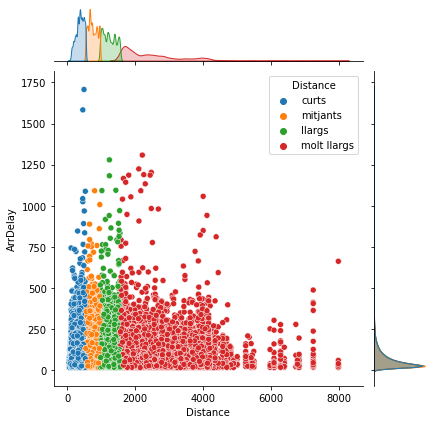

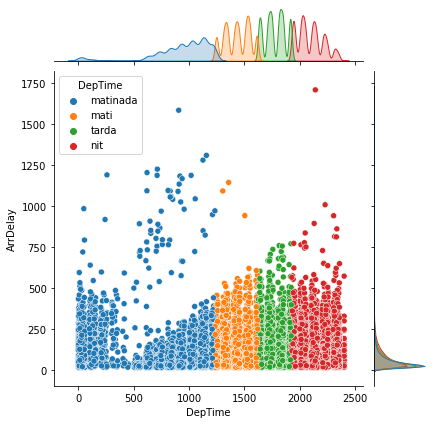

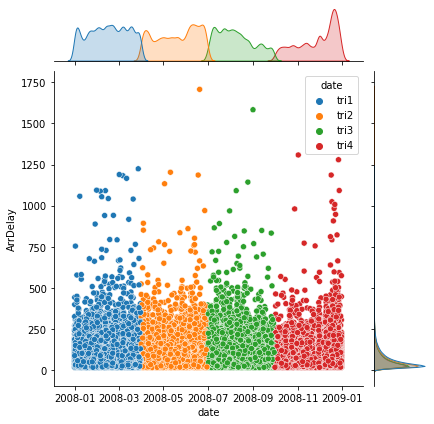

In [14]:
#fig, axs = plt.subplots(figsize=(12,9))

sns.jointplot(x='Distance', y = 'ArrDelay', data=vols_atras, kind = 'scatter',
             hue = pd.qcut(vols_atras['Distance'], q=4,
                     labels=["curts", "mitjants", "llargs", "molt llargs"]))


sns.jointplot(x='DepTime', y = 'ArrDelay', data=vols_atras, kind = 'scatter',
             hue = pd.qcut(vols_atras['DepTime'], q=4,
                     labels=["matinada", "mati", "tarda", "nit"]))

sns.jointplot(x='date', y = 'ArrDelay', data=vols_atras,
             hue=pd.qcut(vols_atras['date'].dt.month, q=4,
             labels=['tri1', 'tri2', 'tri3', 'tri4']))
#fig.tight_layout()

1. En el primer dels gràfics observem que la gran majoria de vols són de menys de 1.000 km i sembla que hi ha més atrasos en els vols considerats curts i mitjants. Per tant, sembla clar que els atrasos no estàn relacionats amb la distància dels vols, més aviat el contrari.

2. En el segon gràfic observem que el 75% dels vols surten en la segona part del dia i la tendència és que és a partir de la segona part del dia $\approx 12 h$ que els atrasos comencen a aumentar. També observem que els atrasos més llargs, encara que pocs, es concentren a l'hora amb menys vols, entre les 5 i les 10 h del matí.

3. Finalment, observem una distribució bastant regular per semestre amb alguns pics de retards a mitjants d'any i, principalment, al desembre, moments de màxim moviment en aquests aeroports, provablament per èpoques festives i de reunions familiars.

<Axes: xlabel='DayOfWeek', ylabel='ArrDelay'>

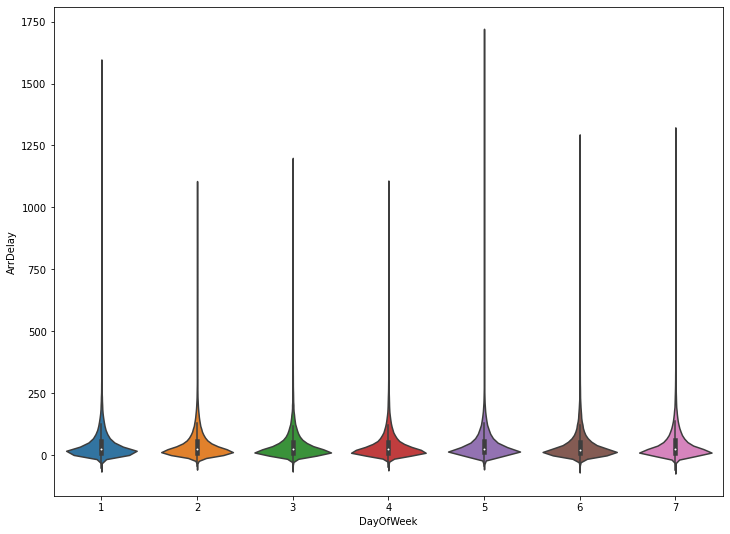

In [15]:
fig, ax = plt.subplots(figsize=(12,9))
sns.violinplot(data=vols, x ='DayOfWeek', y='ArrDelay')

En relació als dies de la setmana no sembla que hi hagi dies més propensos a haver-hi atrasos que d'altres, tot i que podriem pensar que als caps de setmana podria haver-hi més acúmul d'atrasos. 
Un anàlisis interessant podria ser el de comparar el personal que cada companyia té contractada a l'aeroport i com es relaciona el número de treballadors amb el vols atrasats. 
Els pics més alts, tot i no sé representetius estatísticament es donen els dilluns i els dijous.

### Vols atrasats - motius

Analitzarem els motius dels atrasos. Per això, crearem un nou data frame només amb les columnes d'interès. Mostrem la taula i els atrasos acumulats segons els motius per dia i per mes


      CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay
date                                                                        
1         237076.0       42873.0  181840.0         1417.0           312450.0
2         237937.0       56942.0  194144.0          960.0           352736.0
3         252420.0       55124.0  187562.0         1024.0           340645.0
4         197827.0       26065.0  134271.0          975.0           234779.0
5         173924.0       24909.0  130756.0         1059.0           227013.0
6         250874.0       59346.0  241765.0          884.0           359443.0
7         242995.0       58039.0  217797.0         1334.0           315014.0
8         220168.0       37283.0  157874.0          760.0           255781.0
9         126458.0       13971.0   80598.0          632.0           107820.0
10        111855.0       10408.0   72093.0          488.0           118405.0
11        110123.0       12937.0  107218.0          431.0           150236.0

Text(0, 0.5, 'date [days]')

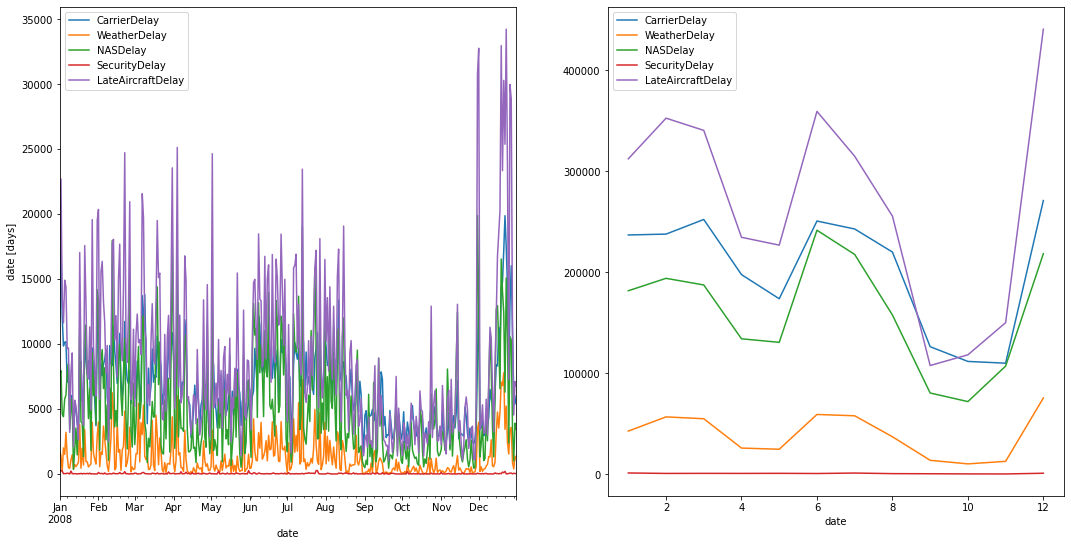

In [16]:
motius = vols_atras[['date','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]
print(motius.groupby(motius['date'].dt.month).sum())

fig, ax = plt.subplots(1,2, figsize=(18,9))
motius.groupby(motius['date']).sum().plot(ax=ax[0])
motius.groupby(motius['date'].dt.month).sum().plot(ax=ax[1])

ax[0].set_ylabel('date [days]')

Observem les oscil.lacions anuals que ja haviem intuit en l'anàlisis bàsic. Tant en el gràfic de tot l'any per dies (esquerre) com per mesos (dreta) observem que de l'abril-maig i entre agost i novembre hi ha una disminució en tots els motius, excepte per motius de mal temps que és pla i tendint a 0. El missatge més clar, però, és que hi ha tres motius principals causants dels atrasos:
1. Atrasos degut a previ atràs de l'avió.
2. Atrasos degut a la companyía.
3. Atrasos degut al sistema aeroespacial nacional (NAS)

Podriem concluir doncs que la logística, sigui de l'aeroport o de la companyía és el principal motiu dels atrasos dels avions. En el lloc més destacat tenim el atrasos acumulats, que no deixen de ser sumes dels problemes de logística acumulats en altres aeroports.

### Atrasos i les companyíes

Donem un cop d'ull a les companyíes que aparèixen al nostre base de dades. Independentment de si els vols estàn o no atrasats. Podem considerar que les companyies més grans són les de més volum de vols.

<Axes: >

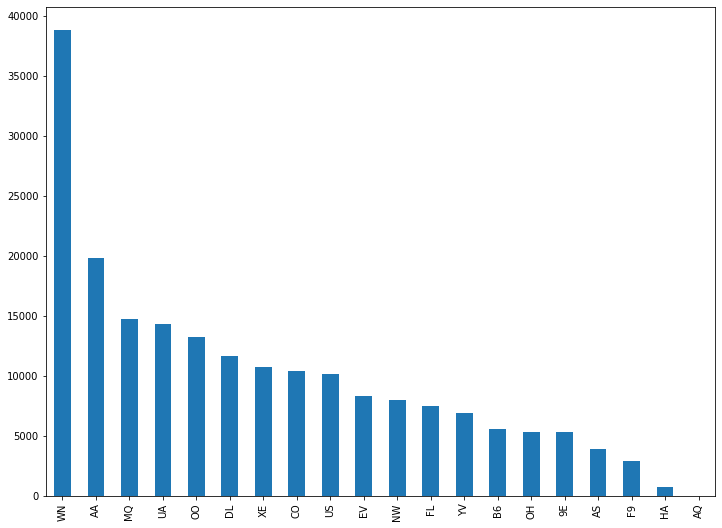

In [17]:
ax, fig = plt.subplots(figsize=(12,9))
vols['UniqueCarrier'].value_counts().plot(kind='bar')

En els gràfics a seguir, mantindrem l'ordre de les companyies, de més a menys volum per facilitar l'anàlisis.

<Axes: xlabel='UniqueCarrier', ylabel='CarrierDelay'>

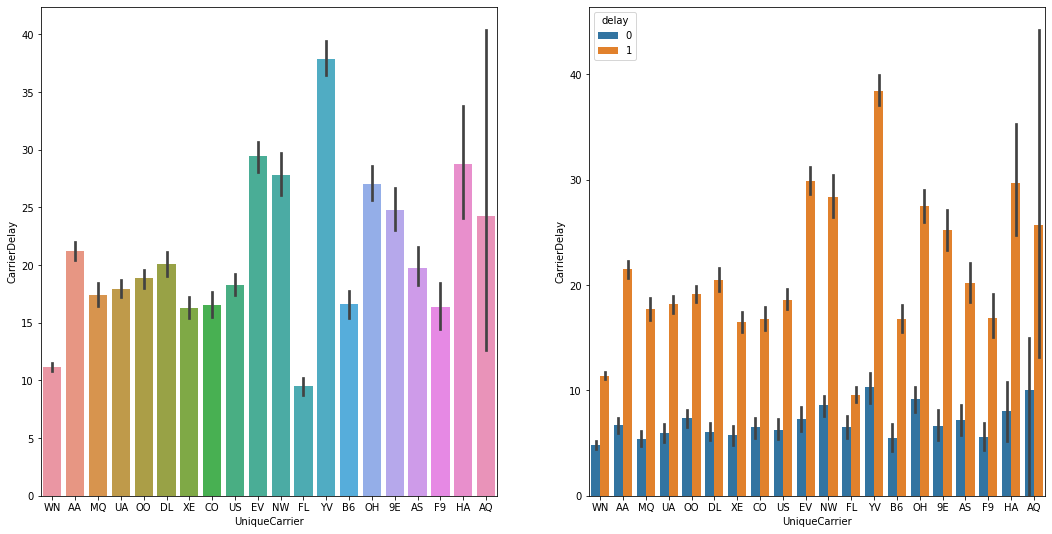

In [18]:
comp = vols['UniqueCarrier'].value_counts().index

fig, ax = plt.subplots(1,2, figsize = (18,9))
sns.barplot(x='UniqueCarrier', y='CarrierDelay', data = vols, ax=ax[0], order=comp)
sns.barplot(x='UniqueCarrier', y='CarrierDelay', data = vols, hue='delay', ax=ax[1], order=comp)

A l'esquerra, la taula de companyies i els retards per companyía amb la corresponent barra d'error. La primera part de la taula, corresponent a les companyies amb més volum de vols és on s'acumulen menys atrasos degut a motius de les pròpies companyies. Les companyies amb menys volum acumulen més atrasos relatius, exceptuant un parell de casos.Destaquem els casos de WN i FL les quals estàn per sota el llindar dels 15 minuts. Això vol dir que aquestes dues empreses van fer bé el treball que depenia d'elles.

A la taula de vols atrasats (1) i no atrasats (0) veiem la contribució, en minuts, dels atrasos degut a la propria companyia i si el vol va ser considerat atrasat (taronja) o puntual (blau). 


##### Vols més llargs i amb més atrasos acumulats

Generem una nova columna contenint l'aeroport d'origen i destí i mostrem les 10 rutes més llargues en kms. Els valors repetits és perquè es considera la ruta en ambdues direccions. En la taula també es mostren la mitja de retards. 
Mostrem també les rutes amb més atrasos acumulats. Comprovem que els vols més llargs no són els que acumulen més minuts.



            Distance    ArrDelay
ruta                            
HNL-EWR  7985.564928  194.000000
EWR-HNL  7985.564928    5.523810
HNL-ATL  7245.266688   75.437500
ATL-HNL  7245.266688   65.178571
ORD-HNL  6828.446592   22.666667
HNL-ORD  6828.446592   29.777778
KOA-ORD  6780.166272   20.750000
ORD-OGG  6733.495296   58.500000
HNL-MSP  6392.314368   21.750000
MSP-HNL  6392.314368   18.916667
HNL-IAH  6282.878976   47.518519
IAH-HNL  6282.878976   21.948718
HNL-DFW  6089.757696   56.076923
DFW-HNL  6089.757696   30.750000
OGG-DFW  5972.275584   30.555556
DFW-OGG  5972.275584   35.375000
ANC-ATL  5499.128448    3.666667
ATL-ANC  5499.128448   21.500000
LIH-DEN  5494.300416   48.000000
DEN-LIH  5494.300416   -1.500000

         ArrDelay
ruta             
ORD-LGA   25045.0
LAX-SFO   24314.0
ORD-EWR   23854.0
ATL-EWR   21756.0
EWR-ORD   20513.0
ATL-LGA   20279.0
DFW-ORD   20122.0
LGA-ORD   18905.0
SFO-LAX   17872.0
CLT-EWR   17556.0


Text(0, 0.5, 'Atrasos [min]')

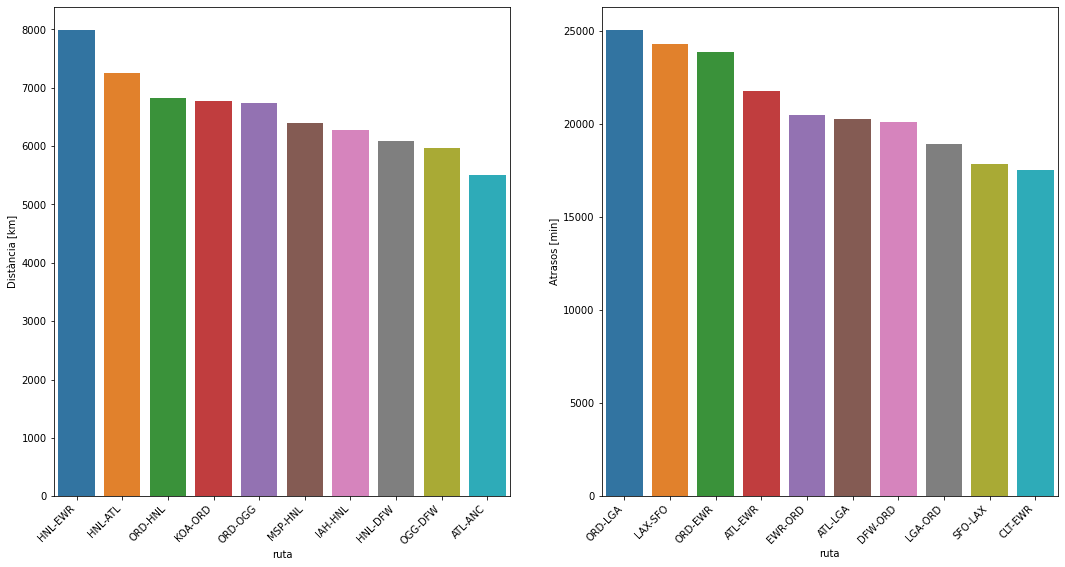

In [19]:
print(vols[['Distance','ArrDelay']].groupby(vols['ruta']).mean().sort_values(by='Distance',ascending=False)[0:20])
print('')
print(vols[['ArrDelay']].groupby(vols['ruta']).sum().sort_values(by='ArrDelay',ascending=False)[0:10])

rutes = vols[['Distance']].groupby(vols['ruta']).max().drop_duplicates(keep='last').sort_values\
                                  (by='Distance',ascending=False)[0:10]

fig, ax = plt.subplots(1,2,figsize=(18,9))

chart1 = sns.barplot(x=rutes.index, y=rutes['Distance'],ax = ax[0])
#plt.suptitle('Distàncies més llargues')
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45, horizontalalignment='right')
chart1.set_ylabel('Distància [km]')


rutes_atras = vols['ArrDelay'].groupby(vols['ruta']).sum().sort_values(ascending=False)[0:10]


chart2 = sns.barplot(x=rutes_atras.index, y=rutes_atras, ax=ax[1])
#plt.suptitle('Rutes amb atrasos acumulats')
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45, horizontalalignment='right')
chart2.set_ylabel('Atrasos [min]')

Mostrem també en quines rutes es donen els atrasos puntuals més llargs. Els dos primers casos es donen en rutes que hem considerat curtes: menys de 1300 km (1 quartil)

In [20]:
print(vols[['ArrDelay', 'Distance']].groupby(vols['ruta']).max().sort_values(by='ArrDelay',ascending=False)[0:10])


         ArrDelay     Distance
ruta                          
LIT-DFW    1707.0   489.240576
OMA-MSP    1583.0   453.835008
LAS-STL    1308.0  2208.019968
HDN-DFW    1279.0  1237.585536
TPA-MSP    1224.0  2103.412608
LAX-MSP    1203.0  2471.952384
SEA-MSP    1189.0  2251.472256
LAS-ORD    1186.0  2438.156160
DEN-DTW    1186.0  1807.293312
FCA-MSP    1166.0  1651.186944


Finalment mostrem quins són, en mitja, els 10 aeroports d'orígen amb més atrasos. El més destacat és l'aeroport Houghton County Memorial Airport, un aeroport relativament petit.

Origin
CMX    252.500000
LCH    123.812500
HDN    117.945455
BGM    110.928571
CDC     99.285714
MQT     95.052632
FLO     94.909091
ITH     92.000000
FCA     89.161290
DLH     88.571429
Name: ArrDelay, dtype: float64


Text(0.5, 0, 'Aeroport orígen')

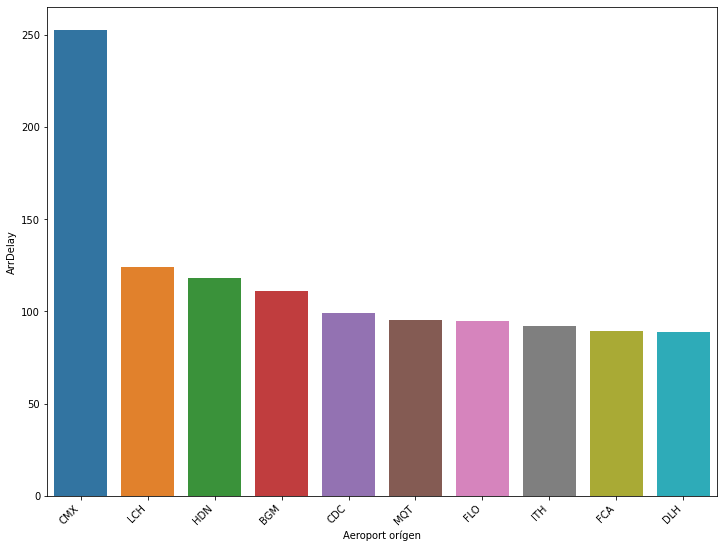

In [21]:
origin = vols['ArrDelay'].groupby(vols['Origin']).mean().sort_values(ascending=False)[0:10]
print(origin)

fig, ax = plt.subplots(figsize=(12,9))
chart = sns.barplot(x=origin.index, y=origin)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_xlabel('Aeroport orígen')

Anem a focar-nos en aquest cas

In [22]:
vols[vols['Origin'] == 'CMX'][['date', 'ArrDelay', 'Origin', 'Dest', 'Distance','CarrierDelay', 'WeatherDelay', 'SecurityDelay','LateAircraftDelay' ]].describe()

,ArrDelay,Distance,CarrierDelay,WeatherDelay,SecurityDelay,LateAircraftDelay
count,4.000000,4.000000,4.00,4.00,4.0,4.000000
mean,252.500000,445.788288,170.75,12.75,0.0,67.250000
std,292.338274,0.000000,341.50,25.50,0.0,85.054394
min,51.000000,445.788288,0.00,0.00,0.0,0.000000
25%,81.750000,445.788288,0.00,0.00,0.0,0.000000
50%,138.000000,445.788288,0.00,0.00,0.0,46.000000
75%,308.750000,445.788288,170.75,12.75,0.0,113.250000
max,683.000000,445.788288,683.00,51.00,0.0,177.000000


In [23]:
vols[vols['Origin'] == 'CMX'][['date', 'ArrDelay', 'Origin', 'Dest', 'UniqueCarrier','Distance','CarrierDelay', 'WeatherDelay', 'SecurityDelay','NASDelay','LateAircraftDelay' ]]

,date,ArrDelay,Origin,Dest,UniqueCarrier,Distance,CarrierDelay,WeatherDelay,SecurityDelay,NASDelay,LateAircraftDelay
688841,2008-04-19,184.0,CMX,MSP,9E,445.788288,0.0,0.0,0.0,7.0,177.0
329433,2008-02-22,51.0,CMX,MSP,9E,445.788288,0.0,51.0,0.0,0.0,0.0
1889996,2008-12-07,92.0,CMX,MSP,9E,445.788288,0.0,0.0,0.0,0.0,92.0
329431,2008-02-07,683.0,CMX,MSP,9E,445.788288,683.0,0.0,0.0,0.0,0.0


Clarament no podem treure conclusions amb aquest cas particular ja que només tenim 4 observacions. Hi ha un retard de 683 minuts per motius intrínsics a la companyía, un altre de 92 i de 177 minuts degut a un retard acumulat, un altre de 51 minuts per mal temps i només un de 7 minuts degut a motius de l'aeroport.

### Exercici 3

Exporta el dataset net i amb les noves columnes a Excel.

In [24]:
vols.to_csv('vols_mostra_mod.csv')